In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.ticker as ticker
import plotly.express as px

%matplotlib inline

In [98]:
data = pd.read_csv("data/Retail_Transaction_Dataset.csv")
df = data.copy()

In [99]:
df.head()

,CustomerID,ProductID,Quantity,Price,TransactionDate,PaymentMethod,StoreLocation,ProductCategory,DiscountApplied(%),TotalAmount
0,109318,C,7,80.079844,12/26/2023 12:32,Cash,"176 Andrew Cliffs\nBaileyfort, HI 93354",Books,18.677100,455.862764
1,993229,C,4,75.195229,8/5/2023 0:00,Cash,"11635 William Well Suite 809\nEast Kara, MT 19483",Home Decor,14.121365,258.306546
2,579675,A,8,31.528816,3/11/2024 18:51,Cash,"910 Mendez Ville Suite 909\nPort Lauraland, MO...",Books,15.943701,212.015651
3,799826,D,5,98.880218,10/27/2023 22:00,PayPal,"87522 Sharon Corners Suite 500\nLake Tammy, MO...",Books,6.686337,461.343769
4,121413,A,7,93.188512,12/22/2023 11:38,Cash,"0070 Michelle Island Suite 143\nHoland, VA 80142",Electronics,4.030096,626.030484


In [100]:
df.shape

(100000, 10)

In [101]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   CustomerID          100000 non-null  int64  
 1   ProductID           100000 non-null  object 
 2   Quantity            100000 non-null  int64  
 3   Price               100000 non-null  float64
 4   TransactionDate     100000 non-null  object 
 5   PaymentMethod       100000 non-null  object 
 6   StoreLocation       100000 non-null  object 
 7   ProductCategory     100000 non-null  object 
 8   DiscountApplied(%)  100000 non-null  float64
 9   TotalAmount         100000 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 7.6+ MB


In [102]:
# TransactionDate: wrong dtype
# Column Names: Improve

df.rename(
    columns={
        'CustomerID': 'Customer_ID',
        'ProductID': "Product_ID",
        'TransactionDate': 'Transaction_Date',
        "PaymentMethod": "Payment_Method",
        "StoreLocation": "Store_Location",
        "ProductCategory": "Product_Category",
        "DiscountApplied(%)": "Discount_Applied(%)",
        "TotalAmount": "Total_Amount"
    }, inplace=True
)

In [103]:
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Customer_ID          100000 non-null  int64         
 1   Product_ID           100000 non-null  object        
 2   Quantity             100000 non-null  int64         
 3   Price                100000 non-null  float64       
 4   Transaction_Date     100000 non-null  datetime64[ns]
 5   Payment_Method       100000 non-null  object        
 6   Store_Location       100000 non-null  object        
 7   Product_Category     100000 non-null  object        
 8   Discount_Applied(%)  100000 non-null  float64       
 9   Total_Amount         100000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 7.6+ MB


In [105]:
df["Product_ID"].unique()

array(['C', 'A', 'D', 'B'], dtype=object)

In [106]:
df["Payment_Method"].unique()

array(['Cash', 'PayPal', 'Debit Card', 'Credit Card'], dtype=object)

In [107]:
df["Store_Location"].unique().__len__()

100000

In [108]:
df.drop(columns=['Store_Location'], inplace=True)

In [109]:
df["Product_Category"].unique()

array(['Books', 'Home Decor', 'Electronics', 'Clothing'], dtype=object)

In [110]:
df.describe()

,Customer_ID,Quantity,Price,Transaction_Date,Discount_Applied(%),Total_Amount
count,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000
mean,500463.982180,5.009290,55.067344,2023-10-29 15:40:05.471399936,10.020155,248.334955
min,14.000000,1.000000,10.000430,2023-04-29 22:27:00,0.000046,8.274825
25%,250693.750000,3.000000,32.549474,2023-07-30 06:45:15,5.001013,95.163418
50%,499679.000000,5.000000,55.116789,2023-10-30 05:12:30,10.030353,200.368393
75%,751104.750000,7.000000,77.456763,2024-01-29 05:44:00,15.018367,362.009980
max,999997.000000,9.000000,99.999284,2024-04-28 22:22:00,19.999585,896.141242
std,288460.917524,2.579808,25.971567,NaN,5.779534,184.554792


In [111]:
df.rename(
    columns={
        "Price": "Price(USD)",
        "Total_Amount": "Total_Amount(USD)"
    }, inplace=True
) # All amounts are assumed to be in USD.

In [112]:
df["Transaction_Month"] = df["Transaction_Date"].dt.strftime("%Y-%m")

In [113]:
high_value = df.groupby('Product_Category')['Total_Amount(USD)'].sum().sort_values(ascending=False)/1000000
high_value = high_value.reset_index()
sales_volume = df.groupby("Product_ID")["Quantity"].mean().sort_values(ascending=False).reset_index()
promotion_effectiveness = df.groupby("Product_Category")["Discount_Applied(%)"].mean().sort_values(ascending=False).reset_index()
seasonality = df['Transaction_Month'].value_counts().sort_index().reset_index().rename(columns={"count": "Number of Transactions", "Transaction_Month": "Months"})
payment_method = df["Payment_Method"].value_counts().reset_index()
repeating_customer = df[df['Customer_ID'].duplicated()]["Customer_ID"].value_counts().sum()
unique_customer = df["Customer_ID"].nunique()
customer_df = pd.Series(
    {"New Customers": unique_customer, "Repeating Customers": repeating_customer}
).reset_index().rename(columns={"index":"Customers", 0: "Number of Customer"})

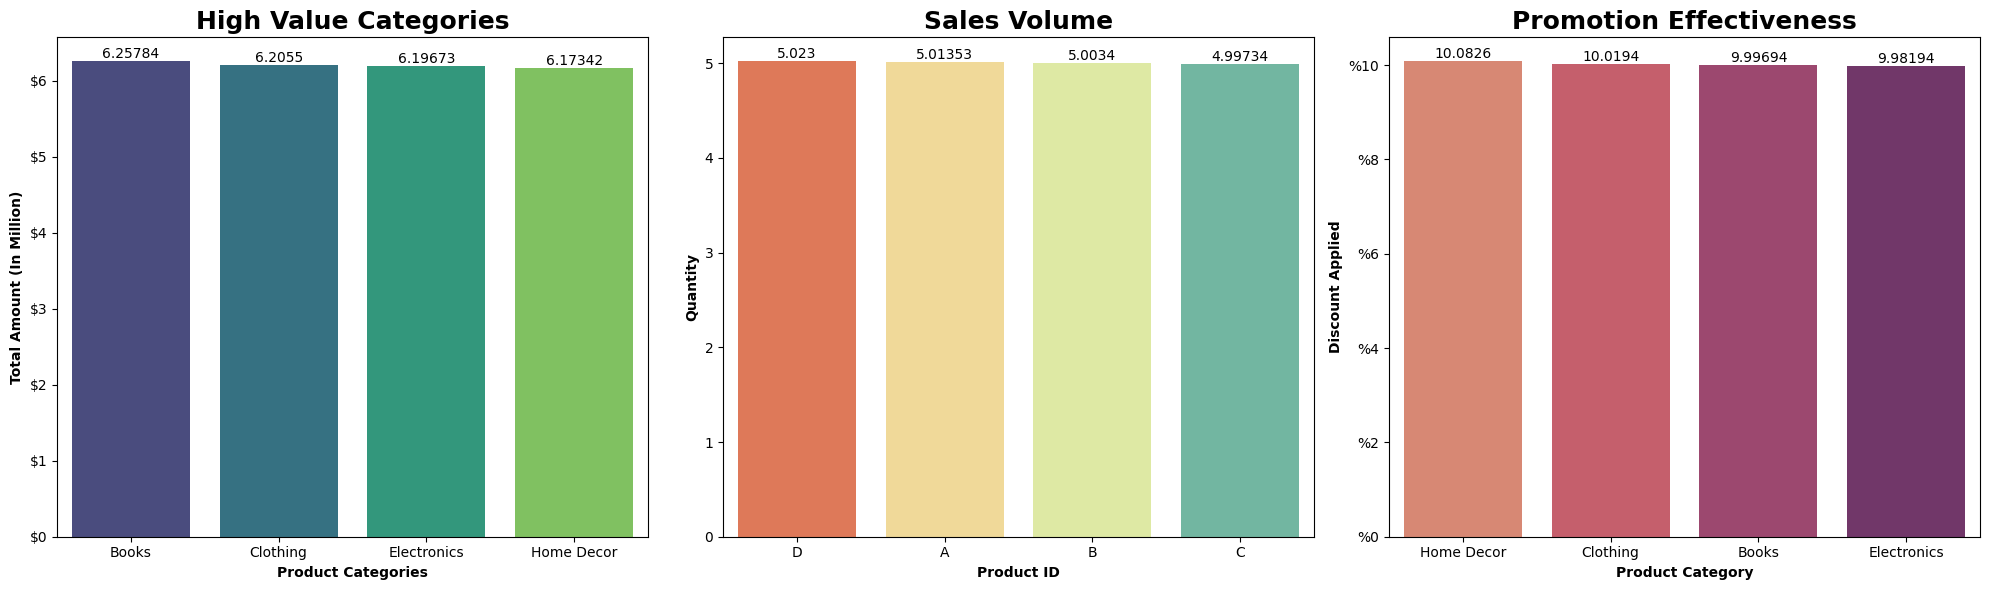

In [114]:
fig, axis = plt.subplots(1, 3, figsize=(20, 6))

# ---------------------------High Value Categories--------------------------

sns.barplot(
    data=high_value,
    x="Product_Category",
    y="Total_Amount(USD)",
    hue="Product_Category",
    palette="viridis", 
    ax=axis[0]
)
for index in range(len(high_value)):
    axis[0].bar_label(axis[0].containers[index])

axis[0].set_title("High Value Categories", fontweight='bold', fontsize=18)
axis[0].set_xlabel("Product Categories", fontweight='bold')
axis[0].set_ylabel("Total Amount (In Million)", fontweight='bold')
axis[0].yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))


# -----------------------------Sales Volume---------------------------------

sns.barplot(
    data=sales_volume,
    x="Product_ID",
    y="Quantity",
    ax=axis[1],
    hue="Product_ID",
    palette='Spectral'
)

for index in range(len(sales_volume)):
    try:
        axis[1].bar_label(axis[1].containers[index])
    except:
        pass

axis[1].set_title("Sales Volume", fontweight='bold', fontsize=18)
axis[1].set_xlabel("Product ID", fontweight='bold')
axis[1].set_ylabel("Quantity", fontweight='bold')

# ------------------------Promotion Effectiveness---------------------------

sns.barplot(
    data=promotion_effectiveness,
    x="Product_Category",
    y="Discount_Applied(%)",
    hue="Product_Category",
    palette="flare",
    ax=axis[2]
)

for index in range(len(promotion_effectiveness)):
    try:
        axis[2].bar_label(axis[2].containers[index])
    except:
        pass

axis[2].set_title("Promotion Effectiveness", fontweight='bold', fontsize=18)
axis[2].set_xlabel("Product Category", fontweight='bold')
axis[2].set_ylabel("Discount Applied", fontweight='bold')
axis[2].yaxis.set_major_formatter(ticker.StrMethodFormatter("%{x:,.0f}"))


# -----------------------------Seasonality-----------------------------------

fig2 = px.line(
    data_frame=seasonality,
    x="Months",
    y="Number of Transactions"
)

fig2.update_layout(
    title_text="Seasonality",
)

fig2.show()

fig.tight_layout()
plt.show()

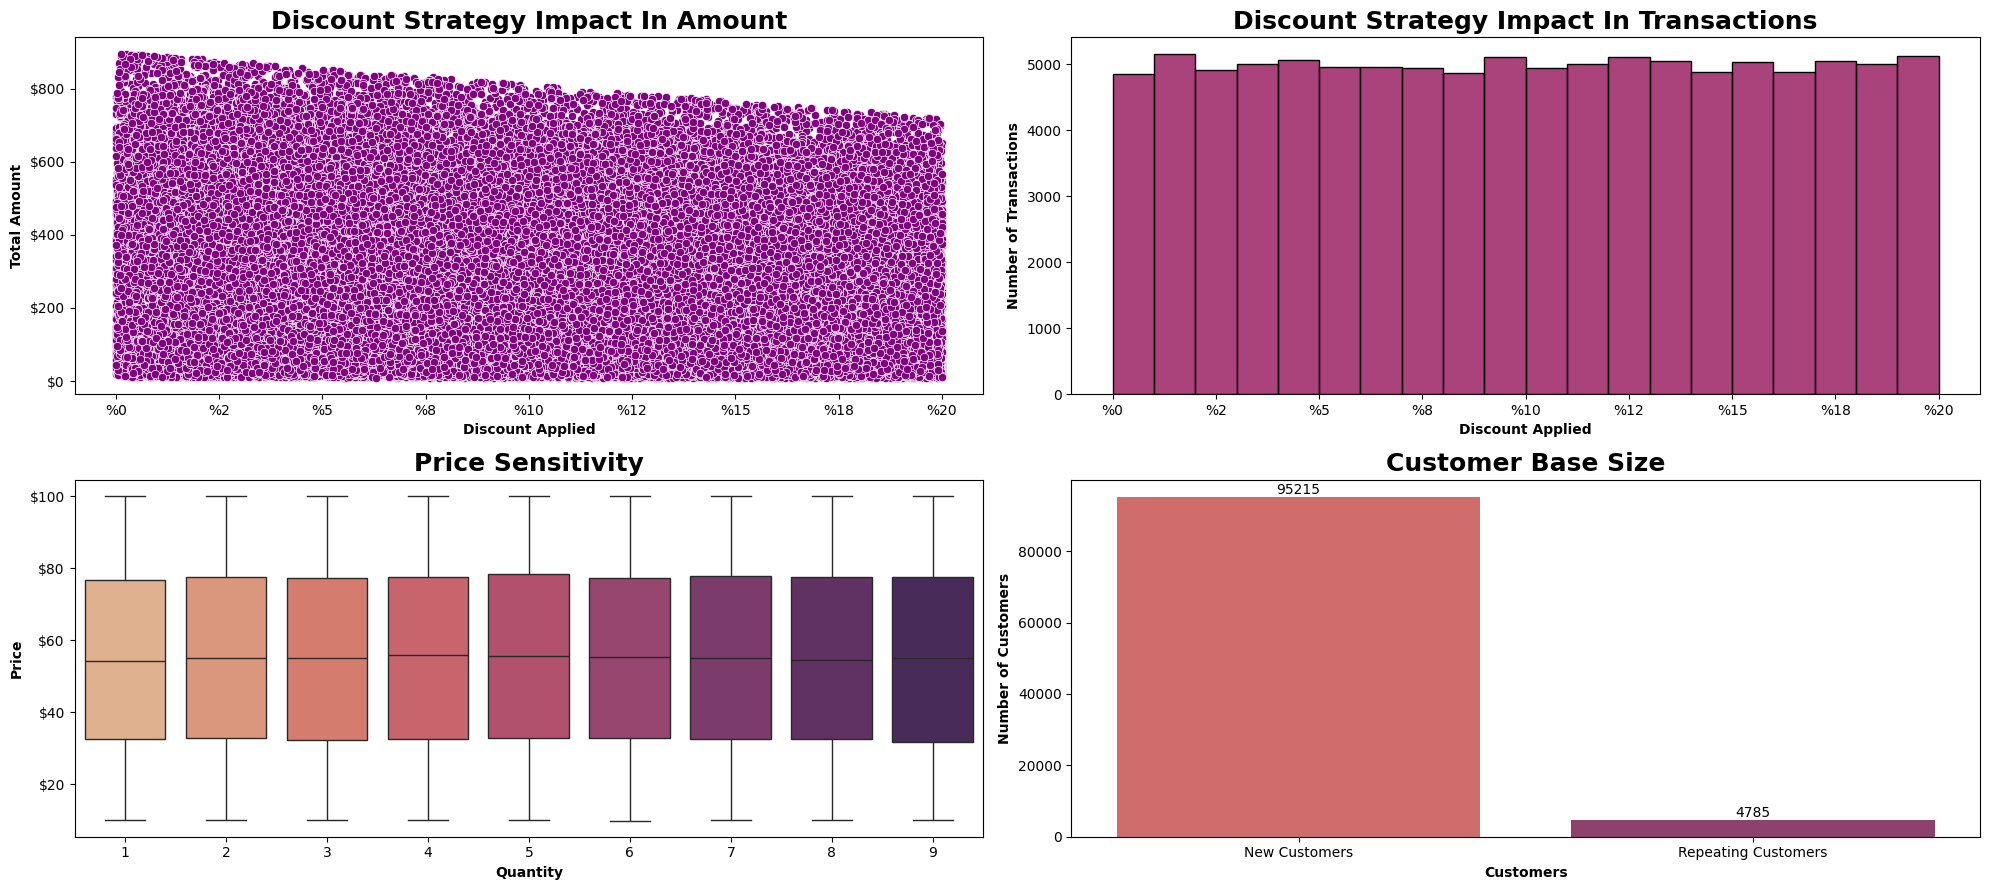

In [115]:
# ------------------------------Payment Preferences-------------------------------
fig = px.pie(
    data_frame=payment_method,
    names="Payment_Method",
    values="count",
    color_discrete_sequence=["#27C181", "#3BB9EF", "#536CCE", "#923BE3"]
)
fig.update_layout(
    title_text="Sales By Product Category"
)
fig.show()


fig, axis = plt.subplots(2, 2, figsize=(20, 9))

# -------------------------------Discount Strategy Impact In Amount-------------------------
sns.scatterplot(
    data=df,
    x="Discount_Applied(%)",
    y="Total_Amount(USD)",
    ax=axis[0, 0],
    color="purple"
)
axis[0, 0].set_title("Discount Strategy Impact In Amount", fontweight='bold', fontsize=18)

axis[0, 0].xaxis.set_major_formatter(ticker.StrMethodFormatter("%{x:,.0f}"))
axis[0, 0].yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
axis[0, 0].set_xlabel("Discount Applied", fontweight='bold')
axis[0, 0].set_ylabel("Total Amount", fontweight='bold')


# -------------------------------Discount Strategy Impact In Transactions-------------------------

sns.histplot(
    data=df,
    x="Discount_Applied(%)",
    bins=20,
    ax=axis[0, 1],
    color="#8E0450"
)
axis[0, 1].set_title("Discount Strategy Impact In Transactions", fontweight='bold', fontsize=18)
axis[0, 1].set_xlabel("Discount Applied", fontweight='bold')
axis[0, 1].set_ylabel("Number of Transactions", fontweight='bold')
axis[0, 1].xaxis.set_major_formatter(ticker.StrMethodFormatter("%{x:,.0f}"))

# ------------------------------------------Price Sensitivity-------------------------------------

sns.boxplot(
    data=df,
    x="Quantity",
    y="Price(USD)",
    ax=axis[1, 0],
    hue="Quantity",
    palette="flare",
    legend=False
)
axis[1, 0].set_title("Price Sensitivity", fontweight='bold', fontsize=18)
axis[1, 0].set_xlabel("Quantity", fontweight='bold')
axis[1, 0].set_ylabel("Price", fontweight='bold')
axis[1, 0].yaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))


# -----------------------------------------Customer Base Size------------------------------------

sns.barplot(
    data=customer_df,
    x="Customers",
    y="Number of Customer",
    ax=axis[1, 1],
    hue="Customers",
    palette="flare"
)

for index in range(len(customer_df)):
    try:
        axis[1, 1].bar_label(axis[1, 1].containers[index])
    except:
        pass

axis[1, 1].set_title("Customer Base Size", fontweight='bold', fontsize=18)
axis[1, 1].set_xlabel("Customers", fontweight='bold')
axis[1, 1].set_ylabel("Number of Customers", fontweight='bold')

fig.tight_layout()
plt.show()

# Retail Transactions Data Insights (2023–2024)

## Summary Insights

From May 2023 to early 2024, retail transactions remained strong and consistent. Each month saw over 8,000 transactions, peaking in July 2023 with nearly 8,600 and dipping slightly in February 2024 to just over 8,000.

Among all product categories, **Books emerged as the top performer**, followed closely by Clothing, Electronics, and Home Decor — all crossing the $6 million revenue mark. Discount strategies showed a slight impact on total amounts but had little effect on the number of transactions, suggesting steady customer demand regardless of promotional intensity.

Sales volume per product was evenly distributed, with Product ID **D** slightly ahead. Payment preferences were split almost evenly across Cash, Credit Card, Debit Card, and PayPal — reflecting a versatile customer base.

Lastly, customer retention shows **a major opportunity**: only 4.8% of customers made repeat purchases, opening the door for loyalty programs and retention strategies.

---

## Detailed Insights

### Seasonality
- Monthly transactions range between **8,070 and 8,597**.
- **Highest month:** July 2023 with 8,597 transactions.
- **Lowest month:** February 2024 with 8,070 transactions.
- Every month maintained **over 8,000 transactions**.

---

### High-Value Product Categories (Total Revenue)
All categories surpassed **$6 million** in total sales:
- **Books:** $6.25 million
- **Clothing:** $6.20 million
- **Electronics:** $6.19 million
- **Home Decor:** $6.17 million

---

### Average Quantity per Product ID
- **Product D:** 5.023
- **Product A:** 5.013
- **Product B:** 5.003
- **Product C:** 4.997

---

### Promotion Effectiveness (Average Discount per Category)
- **Home Decor:** 10.08%
- **Clothing:** 10.01%
- **Books:** 9.99%
- **Electronics:** 9.98%

---

### Payment Method Distribution
- **PayPal:** 25.1%
- **Credit Card:** 25%
- **Cash:** 25%
- **Debit Card:** 24.9%

---

### Discount Strategy Impact on Total Amount
- **Discounts under 5%** → Average transaction: **above $800**
- **Discounts over 15%** → Average transaction: **below $800**

---

### Discount Strategy Impact on Transaction Count
- Regardless of discount (1% to 20%), transactions range between **4,500 to 5,200**.
- *Discount percentage has minimal impact on total transaction volume.*

---

### Customer Base Breakdown
- **One-time customers:** 95,215
- **Repeat customers:** 4,785
- *Only ~4.8% of customers returned, highlighting potential for retention programs.*

---

## Key Takeaways
- Transactions are stable month over month, with high customer activity.
- All product categories are profitable, **Books slightly outperforming** others.
- **Discounts slightly impact revenue**, but not customer behavior.
- Payment methods are evenly used — no dependency on a single method.
- **Customer retention is low** — room to implement loyalty strategies.

---

